Challenge 1: Explore the data and gain some insights into Adventure Works customer charateristics and purchasing behavior

In [22]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [23]:
#Read dataset
AdworksCuts=pd.read_csv('AdvWorksCusts.csv')
AveMonthSpend = pd.read_csv('AW_AveMonthSpend.csv')
BikeBuyer = pd.read_csv('AW_BikeBuyer.csv')

In [24]:
#Merge datasets in one data frame
Customer = pd.merge(AdworksCuts, AveMonthSpend, on='CustomerID')
Customer = pd.merge(Customer, BikeBuyer, on='CustomerID')

In [25]:
#Check the result of the merging
Customer.head()

,CustomerID,Title,FirstName,MiddleName,LastName,Suffix,AddressLine1,AddressLine2,City,StateProvinceName,...,Occupation,Gender,MaritalStatus,HomeOwnerFlag,NumberCarsOwned,NumberChildrenAtHome,TotalChildren,YearlyIncome,AveMonthSpend,BikeBuyer
0,11000,NaN,Jon,V,Yang,NaN,3761 N. 14th St,NaN,Rockhampton,Queensland,...,Professional,M,M,1,0,0,2,137947,89,0
1,11001,NaN,Eugene,L,Huang,NaN,2243 W St.,NaN,Seaford,Victoria,...,Professional,M,S,0,1,3,3,101141,117,1
2,11002,NaN,Ruben,NaN,Torres,NaN,5844 Linden Land,NaN,Hobart,Tasmania,...,Professional,M,M,1,1,3,3,91945,123,0
3,11003,NaN,Christy,NaN,Zhu,NaN,1825 Village Pl.,NaN,North Ryde,New South Wales,...,Professional,F,S,0,1,0,0,86688,50,0
4,11004,NaN,Elizabeth,NaN,Johnson,NaN,7553 Harness Circle,NaN,Wollongong,New South Wales,...,Professional,F,S,1,4,5,5,92771,95,1


In [26]:
#Check all duplicate
print(Customer.shape)
print(Customer.CustomerID.unique().shape)

(17209, 25)
(16404,)


In [27]:
#Remove all duplicate
Customer.drop_duplicates(subset='CustomerID', keep= 'last', inplace = True)
print(Customer.shape)
print(Customer.CustomerID.unique().shape)

(16404, 25)
(16404,)


In [28]:
#Data exploration
Customer.describe()

,CustomerID,HomeOwnerFlag,NumberCarsOwned,NumberChildrenAtHome,TotalChildren,YearlyIncome,AveMonthSpend,BikeBuyer
count,16404.000000,16404.000000,16404.000000,16404.000000,16404.000000,16404.000000,16404.000000,16404.000000
mean,20240.143136,0.674104,1.499756,0.991100,2.004511,78129.672397,72.391002,0.332541
std,5340.370705,0.468723,1.139135,1.514278,1.682318,39728.383493,27.269921,0.471138
min,11000.000000,0.000000,0.000000,0.000000,0.000000,9482.000000,22.000000,0.000000
25%,15617.750000,0.000000,1.000000,0.000000,0.000000,47808.750000,52.000000,0.000000
50%,20231.500000,1.000000,2.000000,0.000000,2.000000,76125.000000,68.000000,0.000000
75%,24862.250000,1.000000,2.000000,2.000000,3.000000,105211.750000,84.000000,1.000000
max,29482.000000,1.000000,4.000000,5.000000,5.000000,196511.000000,176.000000,1.000000


Question 1. Minmum AveMonthSpend $22.00


Question 2. Maximum AveMonthSpend $176.00 


Question 3. Mean AveMonthSpend $72.39  


Question 4. Median AveMonthSpend $68.00 


Question 5. Standard Deviation $27.27

In [29]:
#Check columns with missing values
Customer.isnull().sum()

CustomerID                  0
Title                   16316
FirstName                   0
MiddleName               6951
LastName                    0
Suffix                  16402
AddressLine1                0
AddressLine2            16131
City                        0
StateProvinceName           0
CountryRegionName           0
PostalCode                  0
PhoneNumber                 0
BirthDate                   0
Education                   0
Occupation                  0
Gender                      0
MaritalStatus               0
HomeOwnerFlag               0
NumberCarsOwned             0
NumberChildrenAtHome        0
TotalChildren               0
YearlyIncome                0
AveMonthSpend               0
BikeBuyer                   0
dtype: int64

In [30]:
#Given that the columns with missing values have a large amount of values missing and these columnes are not import, they can be removed
Customer.drop('Title', axis=1, inplace= True)
Customer.drop('MiddleName', axis=1, inplace= True)
Customer.drop('Suffix', axis=1, inplace= True)
Customer.drop('AddressLine2', axis=1, inplace= True)

In [31]:
#Check columns again for missing values
Customer.isnull().sum()

CustomerID              0
FirstName               0
LastName                0
AddressLine1            0
City                    0
StateProvinceName       0
CountryRegionName       0
PostalCode              0
PhoneNumber             0
BirthDate               0
Education               0
Occupation              0
Gender                  0
MaritalStatus           0
HomeOwnerFlag           0
NumberCarsOwned         0
NumberChildrenAtHome    0
TotalChildren           0
YearlyIncome            0
AveMonthSpend           0
BikeBuyer               0
dtype: int64

In [32]:
#Find all bikebuyers and non-bikebuyer
Customer['BikeBuyer'].value_counts()

0    10949
1     5455
Name: BikeBuyer, dtype: int64

Question 6: The distribution of the values in the BikeBuyer column indicates: <br>
Fewer customers have bought bikes than have not bought bikes (10949 vs 5455).

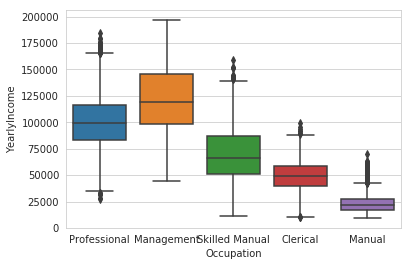

In [33]:
#Data Visualization 
sns.boxplot('Occupation', 'YearlyIncome', data=Customer)
plt.xlabel('Occupation')
plt.ylabel('YearlyIncome')
plt.show()

Question 7: Select the correct order (from lowest to highest) that ranks the median YearlyIncome by Occupation: <br>
Manual, Clerical, Skilled Manual, Professional, Management

In [34]:
#Convert BirthDate data format
Customer['BirthDate']= pd.to_datetime(Customer.BirthDate)
#Insert the date of data collection 1st Jan 1998
DataCollectionDate= '1998-01-01'
DataCollectionDate=pd.to_datetime(DataCollectionDate)

In [35]:
#Convert BirthDate into age at the collection date
from datetime import date
def calculateAge(birthday):
    age = DataCollectionDate.year - birthday.year - ((DataCollectionDate.month, DataCollectionDate.day)<(birthday.month, birthday.day))
    return age

Customer['Age'] = Customer['BirthDate'].apply(calculateAge)

In [36]:
#Classify Customers into age groups
Customer['AgeGroup']=''
Customer.loc[(Customer['Age']<25),'AgeGroup']='Under 25'
Customer.loc[(Customer['Age']>=25) & (Customer['Age']<=45), 'AgeGroup']='Between 25 and 45'
Customer.loc[(Customer['Age']>45) & (Customer['Age']<=55), 'AgeGroup']='Between 45 and 55'
Customer.loc[(Customer['Age']>55), 'AgeGroup']='Over 55'


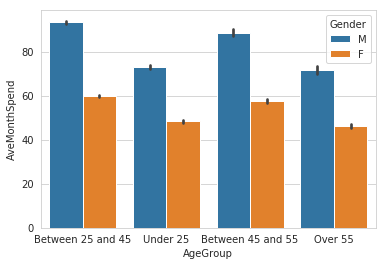

In [37]:
#Plot barchart to demonstrate the distribution of AveMonthSpend among different age groups and genders
sns.barplot(x='AgeGroup', y='AveMonthSpend', hue='Gender', data= Customer)

Question 8. Based on their age at the time when the data was collected (1st January 1998), <br> Males aged between 25 and 45 accounts for the highest AveMonthSpend values. 

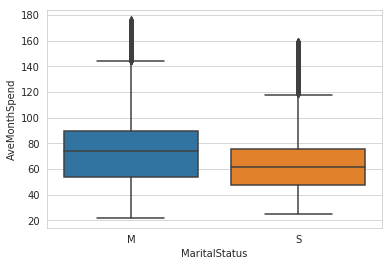

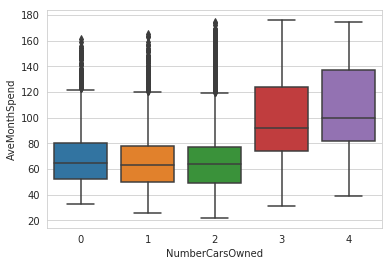

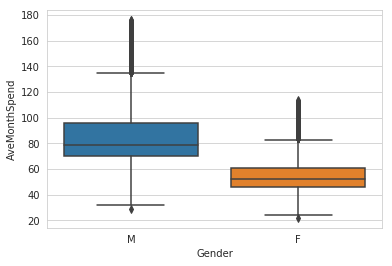

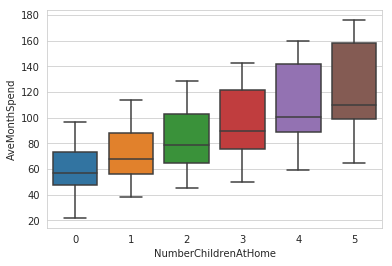

In [38]:
#Given the questions asked, we need to compare AveMonthSpend among different demongraphic values: 
#MaritalStatus, NumberCarsOwned, Gender, NumberChildrenAtHome. 
def plot_box(Customer, cols, col_y ='AveMonthSpend'):
    for col in cols:
        sns.set_style('whitegrid')
        sns.boxplot(col, col_y, data=Customer)
        plt.xlabel(col)
        plt.ylabel(col_y)
        plt.show()
cat_cols = ['MaritalStatus', 'NumberCarsOwned', 'Gender', 'NumberChildrenAtHome']
plot_box(Customer, cat_cols)

Question 9. Which of the following statements about AveMonthSpend are true? <br> 
1. Married customers have a higher median AveMonthSpend than single customers -True <br> 
2. Customers with no car have a higher median AveMonthSpend than customers with three or more cars -False <br>
3. Male customers have a higher median AveMonthSpend than female customers - True <br>
4. Female customers have a wider range of AveMonthSpend values than male customers - False <br>
5. Customers with no children at home have a lower median AveMonthSpend values than customers with one or more children at home. -True 

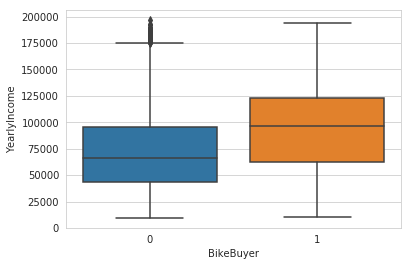

In [39]:
#Given the questions asked, we need to compare the following attributes for bikebuyers and non-bikebuyers:
#YearlyIncome, NumberCarsOwned, Occupation, Gender, MaritalStatus. 
sns.set_style('whitegrid')
sns.boxplot('BikeBuyer', 'YearlyIncome', data=Customer)
plt.xlabel('BikeBuyer')
plt.ylabel('YearlyIncome')
plt.show()

Question 10. Which of the following statement about BikeBuyer are true? <br>
The median YearlyIncome is higher for customers who bought a bike than for a customers who didn't - True

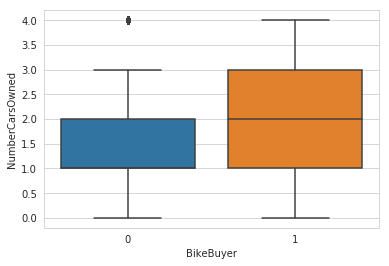

In [40]:
sns.set_style('whitegrid')
sns.boxplot('BikeBuyer', 'NumberCarsOwned', data=Customer)
plt.xlabel('BikeBuyer')
plt.ylabel('NumberCarsOwned')
plt.show()

Question 10. Which of the following statements about BikeBuyer are true? <br>
The median number of cars owned by customeres who bought a bike is lower than for customers who didn't. -False

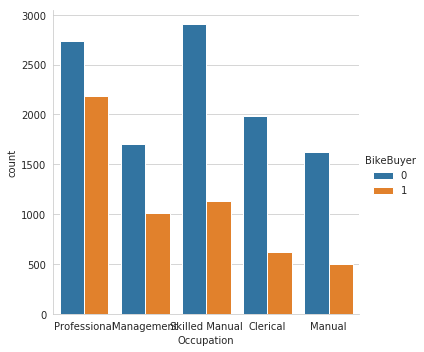

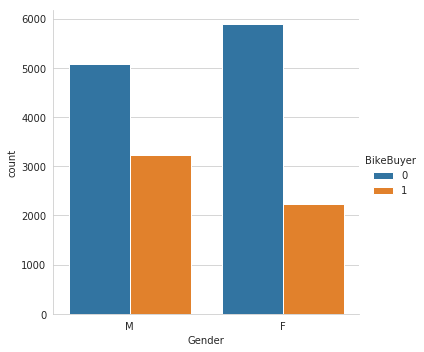

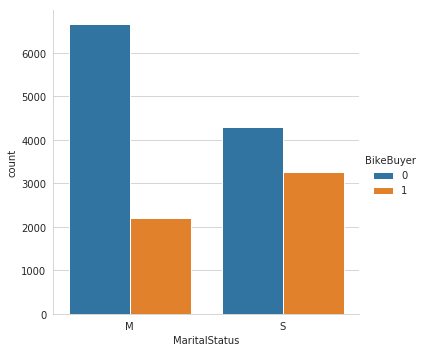

In [41]:
#Utilizing bar charts to visualize categorical features in separate classes. 
sns.catplot(x='Occupation', kind='count', data=Customer, hue='BikeBuyer')
sns.catplot(x='Gender', kind='count', data=Customer, hue='BikeBuyer')
sns.catplot(x='MaritalStatus', kind='count', data=Customer, hue='BikeBuyer')

Question 10. Which of the following statements about BikeBuyer are true? <br>
The most common occupation type for customers who bought a bike is skilled manual - False <br>
Male customers are more likely to buy bikes than female customers - True <br>
A maried customer is more likely to buy a bike - False

In [42]:
Customer.to_csv('Customer.csv', index=False)